In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom, bernoulli
from scipy.stats import pearsonr


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [19]:
from utils import my_fisherz

In [2]:
N = 1000

In [4]:
SIGMA = 0.2
x = norm.rvs(size=N)
y = norm.rvs(size=N)
alpha , beta = np.random.rand(), np.random.rand()
alpha , beta, SIGMA 

(0.16010986456815912, 0.3907408610959767, 0.2)

In [5]:
z = 5 + alpha*x + beta*y + SIGMA*norm.rvs(size=N)

In [6]:
df = pd.DataFrame({'x':x,
             'y':y,
             'z':z,})

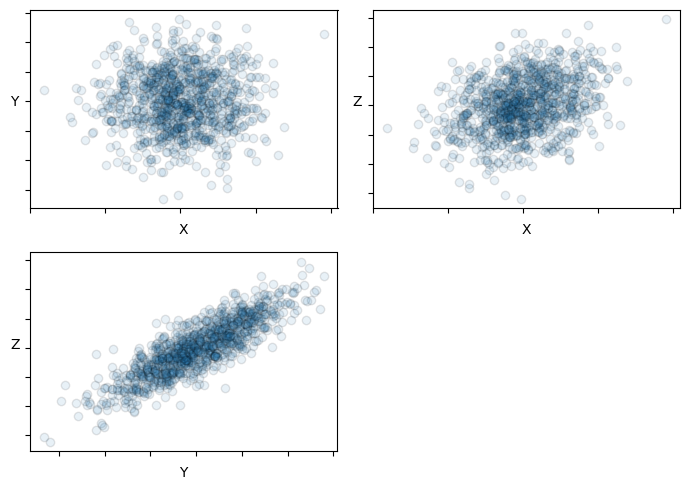

In [7]:
fig = plt.figure(figsize=(7,5))
#plt.suptitle("SPLS", fontsize=25)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x=x, y=y, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Y', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x=x, y=z, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Z', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x=y, y=z, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('Y')
ax.set_ylabel('Z', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [8]:
df = pd.DataFrame({'x':x,
              'y':y,
              'z':z,
             })
df.head()

,x,y,z
0,0.831317,-0.846027,4.783701
1,0.160952,2.616000,5.984150
2,-1.796072,1.868241,5.442095
3,-0.327410,-0.070114,4.949903
4,-0.639171,1.949531,5.748852


In [9]:
df.to_csv('data/model_collider.csv', index=False)

In [13]:
print(f'(x,y) r:{pearsonr(x,y).statistic:.4f} p:{pearsonr(x,y).pvalue:.4f}')
print(f'(x,z) r:{pearsonr(x,z).statistic:.4f} p:{pearsonr(x,z).pvalue:.4f}')
print(f'(y,z) r:{pearsonr(y,z).statistic:.4f} p:{pearsonr(y,z).pvalue:.4f}')

(x,y) r:0.0067 p:0.8331
(x,z) r:0.3280 p:0.0000
(y,z) r:0.8491 p:0.0000


In [16]:
mod = smf.ols(formula='y ~ x + z', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2041.
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:32:06   Log-Likelihood:                -610.10
No. Observations:                1000   AIC:                             1226.
Df Residuals:                     997   BIC:                             1241.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1536      0.160    -63.584      0.0

In [17]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)
z = np.expand_dims(z, axis=1)

In [20]:
my_fisherz(x,y)
my_fisherz(x,y, condition_on=z)

0.2107, 0.8331
19.2757, 0.0000


In [21]:
my_fisherz(x,z)
my_fisherz(x,z, condition_on=y)

10.7541, 0.0000
22.3817, 0.0000


In [22]:
my_fisherz(y,z)
my_fisherz(y,z, condition_on=x)

39.5579, 0.0000
45.8899, 0.0000
